by [Leonardo Manríquez M](https://github.com/leomanriquezm)

E-mail: leonardomanriquezmendez@gmail.com

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

file="https://raw.githubusercontent.com/leomanriquezm/introduction-to-econometrics/main/df_example.csv"
df=pd.read_table(file,delimiter = ',')

Supón que estamos interesados en estimar la siguiente función de regresión:
\
\begin{equation}
Ventas_{i}=\beta_{0}+\beta_{1}\cdot Descuento_{i} + \beta_{2}\cdot PrecioProducto_{i}+ \beta_{3}\cdot EdadClientes_{i}+\mu_{i}.
\tag{1}
\end{equation}

In [44]:
# Ajustar el modelo de regresión lineal múltiple
X = df[["Descuento","PrecioProducto","EdadClientes"]]
# Agregar columna de unos para el término constante
X = sm.add_constant(X)
y = df['Ventas']

model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           6.15e-42
Time:                        20:39:59   Log-Likelihood:                -622.69
No. Observations:                 100   AIC:                             1253.
Df Residuals:                      96   BIC:                             1264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1171.9559     51.742     22.

Sin embargo, como estamos trabajando con datos de corte transversal se sospecha la presencia de heterocedasticidad. Para explorar la existencia de este fenómeno se realizará la prueba de White, la cual tiene la siguiente hipótesis:
\begin{equation}
\begin{split}
H_{0}&: \sigma_{i}^{2}=\sigma^{2}, \\
H_{1}&: \text{No se verifica que }\sigma_{i}^{2}=\sigma^{2}.
\end{split}
\end{equation}
Notar que $H_{0}$ hace referencia a la igualdad de varianzas: todos los errores tienen la misma varianza.

In [43]:
residuals = model.resid
white_test = het_white(residuals, X)
print("Estadístico de prueba:", white_test[0])
print("P-valor:", white_test[1])

Estadístico de prueba: 13.57300450474208
P-valor: 0.13834556040394372


Ahora, al considerar un valor de $\alpha=0.05$ NO es posible rechazar $H_{0}$ debido a que $p-value>\alpha$. Esto implica que la heterocedasticidad no es un problema en nuestro modelo según la prueba de White.

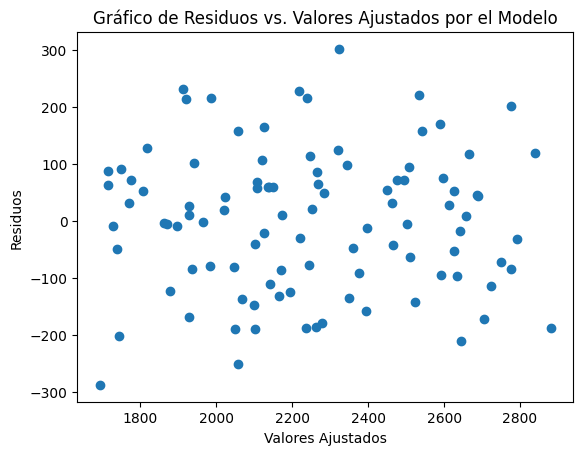

In [40]:
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados por el Modelo")
plt.show()

Sin embargo, por la naturaleza de los datos. Se realiza la misma estimación en (1) pero considerando la matriz de varianzas y covarianzas consistente con heterocedasticidad.

In [41]:
# Ajustar el modelo de regresión lineal múltiple considerando matriz de varianzas y covarianzas robusta
model = sm.OLS(y, X).fit(cov_type='HC0')
# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.27e-42
Time:                        20:37:14   Log-Likelihood:                -622.69
No. Observations:                 100   AIC:                             1253.
Df Residuals:                      96   BIC:                             1264.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1171.9559     51.717     22.

In [50]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breusch_pagan_test = het_breuschpagan(model.resid, X)
print(lzip(name, breusch_pagan_test))

[('Lagrange multiplier statistic', 7.757196648201448), ('p-value', 0.05130551154105414), ('f-value', 2.691053217406432), ('f p-value', 0.05052235911693393)]


Notar que este resultado, difiere con el resultado anterior en las siguientes columnas: error estándar, estadístico, valor-p e intervalo de confianza. Esto tiene sentido debido a que las matriz que estamos considerando cambia el valor de los errores estándar, los cuales se utilizan para encontrar: estadístico, valor-p e intervalo de confinza. Notar también que el valor del coeficiente NO cambia.\
En presencia de datos de corte transversal, utilizaremos la información de la matriz robusta para realizar inferencia.